# 3　必要な数学のイントロ

## 3.1　関数

入力$x$それぞれに1つの出力$y$の値が対応しているものを**関数**(function)といって、$y=f(x)$と書いたりします。ここでは、matplotlib.pyplotというpythonのグラフィックを支えるライブラリを用いて、グラフを書きながら様々な関数と親しみます。

### 多項式関数
出力$y$を入力$x$の多項式で表現できるとき、この関数を**多項式関数**といいます。

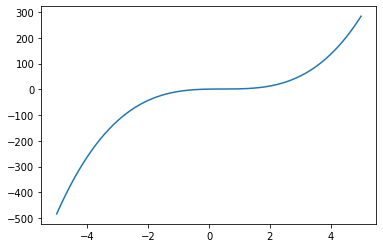

In [1]:
# 多項式関数
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.01)
y = 3*x**3-4*x**2+2*x+1    # f(x) = 3x³-4x²+2x+1
plt.plot(x,y)
plt.show()

### 指数関数
**指数関数**は指数関数的爆発という言葉に代表されるように、急上昇や急降下を表現する際に用いられます。また、正規分布の確率密度関数を表現する時に現れるなど、統計モデルを表現する時に現れる代表的な関数の一つです。

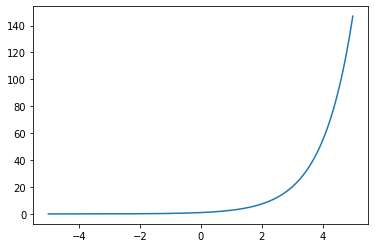

In [2]:
# 指数関数
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.01)
y = np.exp(x)    # f(x) = exp(x)
plt.plot(x,y)
plt.show()

### 対数関数
**対数関数**は指数関数と違い、値の増加や現象が極めて緩やかな関数です。指数関数のように少しの入力値の変化が出力値のオーバーフローやアンダーフローを起こしかねないような関数に対して対数をとっておくことで、この問題を緩和するなどの用い方をしたりします。

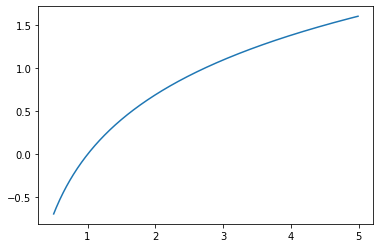

In [3]:
# 対数関数
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5,5,0.01)
y = np.log(x)    # f(x) = log(x)
plt.plot(x,y)
plt.show()

### sigmoid関数
sigmoid関数は
* 0から1の間の値をとる。
* $x$の値が大きくなると、 $y$の値も大きくなる。

ので、確率のモデリングにしばしば用いられます。

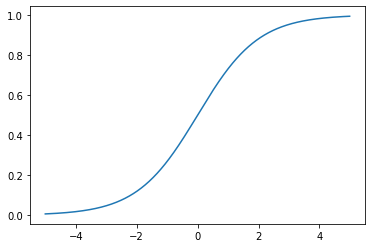

In [4]:
# sigmoid関数の実装
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5,5,0.01)
y = sigmoid(x)    # f(x) = sigmoid(x)
plt.plot(x,y)
plt.show()

他にも階段関数やReLU関数などを紹介しておきましょう。ニューラルネットワークに興味がある人は、**活性化関数**という概念でこの関数に後でお世話になります。

<ipython-input-5-c30b25a96415>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


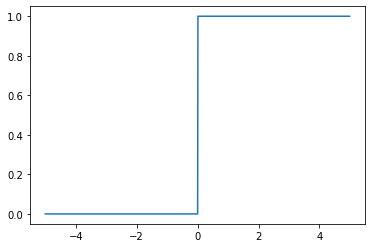

In [5]:
# step関数の実装
import matplotlib.pyplot as plt
import numpy as np

def step(x):
    return np.array(x > 0, dtype = np.int)
    
x = np.arange(-5,5,0.01)
y = step(x)    # f(x) = step(x)
plt.plot(x,y)
plt.show()

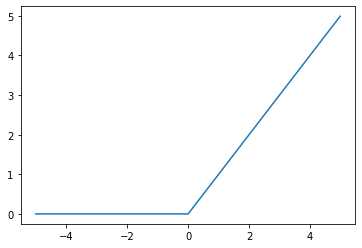

In [6]:
# ReLUの実装
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    return np.maximum(0, x)
    
x = np.arange(-5,5,0.01)
y = ReLU(x)    # f(x) = ReLUx)
plt.plot(x,y)
plt.show()

## 3.2 微分

微分はグラフの傾きを求める操作のことです。特に各点のグラフの傾きを**微分係数**といい、各点に対して**微分係数**を返す関数を**導関数**といいます。関数$y=f(x)$の導関数を$f'(x)$と書きます。上で紹介した関数の導関数にはそれぞれ公式が知られており、とても有用です。例えば、
* $(x^n)'=nx^{n-1}$
* $(\sin x)'=\cos x$, $(\cos x)'=-\sin x$
* $(\exp x)'=\exp x$
* $(\log x)'=\frac{1}{x}$

が知られています。

機械学習では「損失関数の最小値を与える点の値を求める」という文脈で**最小値問題**がよくでてきます。微分はこの最小値問題を解くうえでとても強力な手法の一つです。例えば、**勾配降下法**という数値計算を紹介します。勾配降下法では、
* 初期値$x=x_0$
* $x_{n+1}=x_{n}-\eta f'(x_{n})$, ただし$\eta$は**学習率**と呼ばれる定数。

と値を更新していくことで、最小値を与える点の値を求められることがあります。（必ず求められるとは限りません。）

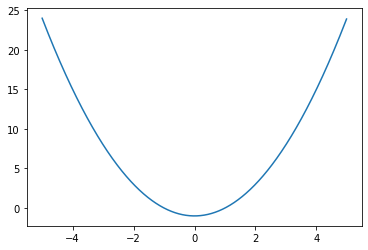

In [7]:
# 最小値を与える点を求めたい関数
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.01)
y = x**2-1    # f(x) = x²-1
plt.plot(x,y)
plt.show()

In [8]:
# 勾配降下法
def gradient_descent(start,eta,iter):    # start：初期値 / eta：学習率 / iter：繰り返し数
    x = start
    for i in range(iter):
        x = x - eta*(2*x)
    
    return x
        
gradient_descent(start=4, eta=0.1, iter=100)    # 最小値を与える点になっている。

8.148143905337951e-10

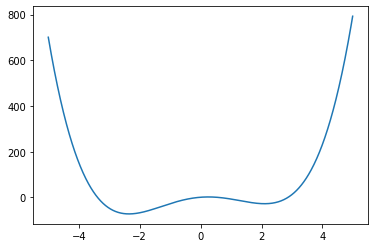

In [9]:
# 最小値を与える点を求めたい関数
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.01)
y = 2*x**4 - 20*x**2 + 10*x + 1    # f(x) = 2x⁴-20x²+10x+1
plt.plot(x,y)
plt.show()

In [10]:
# 勾配降下法
def gradient_descent(start,eta,iter):    # start：初期値 / eta：学習率 / iter：繰り返し数
    x = start
    for i in range(iter):
        x = x - eta*(8*x**3-40*x+10)
    
    return x
        
gradient_descent(start=4, eta=0.01, iter=100)    # 局所最適解に落ちてしまった。

2.098662056477517

## 3.3　確率と確率分布

統計学や機械学習は「偶然性」と向き合う学問です。偶然性を表現するために、私たちは確率・確率分布とよばれるものを用いていきます。改めて詳細に解説していくので、ここでしっかりわかる必要はありませんが、確率や確率分布がどのように用いられるのか、その一例をみてみましょう。

例えば、普段のすうがくぶんかでは講座の申し込みが1日あたり平均5件来ていたものとします。しかし、I先生はここ二週間は申し込み数が少ないのではないかと疑っていました。そこでI先生は次のような分析を行うことにしました。

まずI先生は過去の申し込み数の傾向を「確率分布」を用いてモデリングします。I先生は**ポアソン分布**とよばれる確率分布が適切だと考えました。（このようなアテをつける上で、記述統計学における可視化や推測統計学における統計的推測が大切になってきます。）

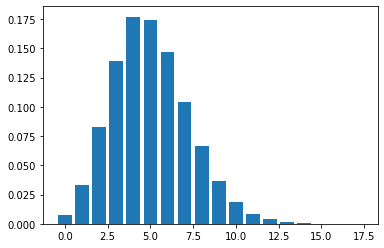

In [11]:
# ポアソン分布のシミュレーション
import numpy as np
import matplotlib.pyplot as plt

x = np.random.poisson(size = 10**5, lam = 5.0)
x, height = np.unique(x, return_counts = True)
plt.bar(x = x, height = height/height.sum())
plt.show()

次に、直近一週間の申し込み数を調べると21件でした。そこで、I先生は申し込み数がお一週間で21件以下になる確率を、このポアソン分布から計算してみることにしました。

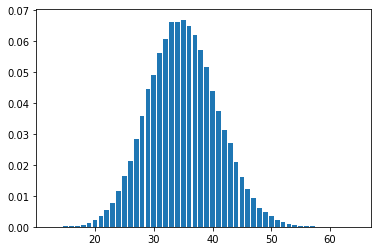

In [12]:
# シミュレーション
sim = []

for i in range(10**5):    # 10^5回シミュレーションする
    sim.append(0)
    for j in range(7):    # 一週間（7日）のメールの数を調べる
        sim[i] += np.random.poisson(size = 1, lam = 5.0)
        
x, height = np.unique(sim, return_counts = True)
plt.bar(x = x, height = height/height.sum())
plt.show()

この結果、申し込みが普段の傾向どおりであれば、21件以下になる確率は1%未満であることがわかりました。

In [13]:
(np.asarray(sim) <= 21).mean()

0.00802

このことから異常が起きていることに確信をもったI先生は、調査の結果、webサイトの申し込みフォームが正常に機能していないことに気づきました。

**Remark**　これは**異常検知**とよばれている機械学習のタスクです。確率・確率分布の考え方はこの異常検知に限らず、推測統計学や機械学習の様々なタスクでとても役に立ちます。みなさんは、この講座を通して、この確率・確率分布の考え方の大切さを学ぶことになると思います。